In [1]:
import pandas as pd
#read dataset
df = pd.read_csv('sample_disease_dataset.csv')
df.head()

,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,symptom7,symptom8,results
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [2]:
from sklearn import preprocessing
#min-max normalization 
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

In [3]:
from sklearn.model_selection import train_test_split
# split into input (X) and output (y) variables
X = x_scaled[:,0:8]
y = x_scaled[:,8]
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.2, random_state=12)


Using TensorFlow backend.
/Users/ndesignai/VENVS/image/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/ndesignai/VENVS/image/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/ndesignai/VENVS/image/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/ndesignai/VENVS/image/lib/pytho




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 18        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


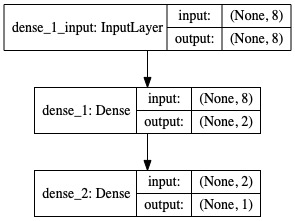

In [4]:
#importing library 
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(2, input_dim=8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
import tensorflow as tf
tf.keras.utils.plot_model(model, to_file='model.jpg',show_shapes=True, show_layer_names=True)

In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=100,batch_size=128,shuffle=True,verbose=1)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 392 samples, validate on 98 samples
Epoch 1/1000
392/392 [==============================] - 0s 511us/step - loss: 0.7066 - acc: 0.5587 - val_loss: 0.6942 - val_acc: 0.6531
Epoch 2/1000
392/392 [==============================] - 0s 16us/step - loss: 0.7047 - acc: 0.5612 - val_loss: 0.6933 - val_acc: 0.6633
Epoch 3/1000
392/392 [==============================] - 0s 14us/step - loss: 0.7033 - acc: 0.5791 - val_loss: 0.6926 - val_acc: 0.6429
Epoch 4/1000
392/392 [==============================] - 0s 15us/step - loss: 0.7020 - acc: 0.5918 - val_loss: 0.6919 - val_acc: 0.6327
Epoch 5/1000
392/392 [==============================] - 0s 14us/step - loss: 0.7009 - acc: 0.5969 - val_loss: 0.6913 - val_acc: 0.6429
Epoch 6/1000
392/392 [==============================] - 0s 16us/step - loss: 0.6999 - acc: 0.6046 - val_loss: 0.6905 - val_acc: 0.6531
Epoch 7/1000
392/392 [=========================

392/392 [==============================] - 0s 14us/step - loss: 0.6701 - acc: 0.6684 - val_loss: 0.6716 - val_acc: 0.6224
Epoch 55/1000
392/392 [==============================] - 0s 13us/step - loss: 0.6697 - acc: 0.6684 - val_loss: 0.6713 - val_acc: 0.6122
Epoch 56/1000
392/392 [==============================] - 0s 14us/step - loss: 0.6694 - acc: 0.6709 - val_loss: 0.6711 - val_acc: 0.6122
Epoch 57/1000
392/392 [==============================] - 0s 15us/step - loss: 0.6690 - acc: 0.6658 - val_loss: 0.6708 - val_acc: 0.6122
Epoch 58/1000
392/392 [==============================] - 0s 16us/step - loss: 0.6687 - acc: 0.6658 - val_loss: 0.6706 - val_acc: 0.6122
Epoch 59/1000
392/392 [==============================] - 0s 13us/step - loss: 0.6683 - acc: 0.6709 - val_loss: 0.6703 - val_acc: 0.6224
Epoch 60/1000
392/392 [==============================] - 0s 13us/step - loss: 0.6678 - acc: 0.6684 - val_loss: 0.6700 - val_acc: 0.6224
Epoch 61/1000
392/392 [==============================] - 0s 15

392/392 [==============================] - 0s 15us/step - loss: 0.6537 - acc: 0.6658 - val_loss: 0.6587 - val_acc: 0.6531
Epoch 115/1000
392/392 [==============================] - 0s 13us/step - loss: 0.6535 - acc: 0.6633 - val_loss: 0.6587 - val_acc: 0.6531
Epoch 116/1000
392/392 [==============================] - 0s 12us/step - loss: 0.6533 - acc: 0.6658 - val_loss: 0.6587 - val_acc: 0.6429
Epoch 117/1000
392/392 [==============================] - 0s 15us/step - loss: 0.6531 - acc: 0.6658 - val_loss: 0.6586 - val_acc: 0.6429
Epoch 118/1000
392/392 [==============================] - 0s 14us/step - loss: 0.6529 - acc: 0.6658 - val_loss: 0.6583 - val_acc: 0.6429
Epoch 119/1000
392/392 [==============================] - 0s 14us/step - loss: 0.6527 - acc: 0.6658 - val_loss: 0.6581 - val_acc: 0.6429
Epoch 120/1000
392/392 [==============================] - 0s 14us/step - loss: 0.6525 - acc: 0.6658 - val_loss: 0.6580 - val_acc: 0.6429
Epoch 121/1000
392/392 [==============================] 

Epoch 174/1000
392/392 [==============================] - 0s 16us/step - loss: 0.6402 - acc: 0.6786 - val_loss: 0.6396 - val_acc: 0.6429
Epoch 175/1000
392/392 [==============================] - 0s 15us/step - loss: 0.6399 - acc: 0.6811 - val_loss: 0.6391 - val_acc: 0.6429
Epoch 176/1000
392/392 [==============================] - 0s 14us/step - loss: 0.6395 - acc: 0.6811 - val_loss: 0.6386 - val_acc: 0.6429
Epoch 177/1000
392/392 [==============================] - 0s 17us/step - loss: 0.6391 - acc: 0.6811 - val_loss: 0.6382 - val_acc: 0.6429
Epoch 178/1000
392/392 [==============================] - 0s 15us/step - loss: 0.6387 - acc: 0.6811 - val_loss: 0.6379 - val_acc: 0.6429
Epoch 179/1000
392/392 [==============================] - 0s 17us/step - loss: 0.6384 - acc: 0.6786 - val_loss: 0.6376 - val_acc: 0.6429
Epoch 180/1000
392/392 [==============================] - 0s 15us/step - loss: 0.6381 - acc: 0.6786 - val_loss: 0.6376 - val_acc: 0.6429
Epoch 181/1000
392/392 [=================

Epoch 234/1000
392/392 [==============================] - 0s 14us/step - loss: 0.6215 - acc: 0.6913 - val_loss: 0.6185 - val_acc: 0.6531
Epoch 235/1000
392/392 [==============================] - 0s 15us/step - loss: 0.6212 - acc: 0.6862 - val_loss: 0.6179 - val_acc: 0.6633
Epoch 236/1000
392/392 [==============================] - 0s 16us/step - loss: 0.6209 - acc: 0.6888 - val_loss: 0.6175 - val_acc: 0.6633
Epoch 237/1000
392/392 [==============================] - 0s 16us/step - loss: 0.6206 - acc: 0.6888 - val_loss: 0.6172 - val_acc: 0.6735
Epoch 238/1000
392/392 [==============================] - 0s 16us/step - loss: 0.6203 - acc: 0.6888 - val_loss: 0.6169 - val_acc: 0.6735
Epoch 239/1000
392/392 [==============================] - 0s 15us/step - loss: 0.6200 - acc: 0.6862 - val_loss: 0.6167 - val_acc: 0.6735
Epoch 240/1000
392/392 [==============================] - 0s 13us/step - loss: 0.6197 - acc: 0.6862 - val_loss: 0.6162 - val_acc: 0.6837
Epoch 241/1000
392/392 [=================

Epoch 294/1000
392/392 [==============================] - 0s 14us/step - loss: 0.6050 - acc: 0.6888 - val_loss: 0.6047 - val_acc: 0.6837
Epoch 295/1000
392/392 [==============================] - 0s 17us/step - loss: 0.6048 - acc: 0.6888 - val_loss: 0.6039 - val_acc: 0.6837
Epoch 296/1000
392/392 [==============================] - 0s 15us/step - loss: 0.6042 - acc: 0.6913 - val_loss: 0.6032 - val_acc: 0.6837
Epoch 297/1000
392/392 [==============================] - 0s 16us/step - loss: 0.6039 - acc: 0.6837 - val_loss: 0.6021 - val_acc: 0.6837
Epoch 298/1000
392/392 [==============================] - 0s 17us/step - loss: 0.6035 - acc: 0.6837 - val_loss: 0.6015 - val_acc: 0.6837
Epoch 299/1000
392/392 [==============================] - 0s 16us/step - loss: 0.6032 - acc: 0.6862 - val_loss: 0.6012 - val_acc: 0.6837
Epoch 300/1000
392/392 [==============================] - 0s 15us/step - loss: 0.6030 - acc: 0.6862 - val_loss: 0.6008 - val_acc: 0.6735
Epoch 301/1000
392/392 [=================

Epoch 354/1000
392/392 [==============================] - 0s 13us/step - loss: 0.5915 - acc: 0.6939 - val_loss: 0.5880 - val_acc: 0.6939
Epoch 355/1000
392/392 [==============================] - 0s 12us/step - loss: 0.5914 - acc: 0.6913 - val_loss: 0.5876 - val_acc: 0.6939
Epoch 356/1000
392/392 [==============================] - 0s 12us/step - loss: 0.5912 - acc: 0.6888 - val_loss: 0.5873 - val_acc: 0.6939
Epoch 357/1000
392/392 [==============================] - 0s 14us/step - loss: 0.5910 - acc: 0.6888 - val_loss: 0.5870 - val_acc: 0.6939
Epoch 358/1000
392/392 [==============================] - 0s 13us/step - loss: 0.5908 - acc: 0.6888 - val_loss: 0.5867 - val_acc: 0.6939
Epoch 359/1000
392/392 [==============================] - 0s 13us/step - loss: 0.5906 - acc: 0.6939 - val_loss: 0.5865 - val_acc: 0.6939
Epoch 360/1000
392/392 [==============================] - 0s 13us/step - loss: 0.5904 - acc: 0.6939 - val_loss: 0.5864 - val_acc: 0.6939
Epoch 361/1000
392/392 [=================

Epoch 414/1000
392/392 [==============================] - 0s 12us/step - loss: 0.5804 - acc: 0.6837 - val_loss: 0.5805 - val_acc: 0.6837
Epoch 415/1000
392/392 [==============================] - 0s 15us/step - loss: 0.5802 - acc: 0.6862 - val_loss: 0.5803 - val_acc: 0.6837
Epoch 416/1000
392/392 [==============================] - 0s 13us/step - loss: 0.5800 - acc: 0.6837 - val_loss: 0.5801 - val_acc: 0.6837
Epoch 417/1000
392/392 [==============================] - 0s 13us/step - loss: 0.5799 - acc: 0.6837 - val_loss: 0.5797 - val_acc: 0.6837
Epoch 418/1000
392/392 [==============================] - 0s 14us/step - loss: 0.5796 - acc: 0.6939 - val_loss: 0.5789 - val_acc: 0.6837
Epoch 419/1000
392/392 [==============================] - 0s 13us/step - loss: 0.5791 - acc: 0.6888 - val_loss: 0.5782 - val_acc: 0.6837
Epoch 420/1000
392/392 [==============================] - 0s 15us/step - loss: 0.5787 - acc: 0.6888 - val_loss: 0.5775 - val_acc: 0.6939
Epoch 421/1000
392/392 [=================

Epoch 474/1000
392/392 [==============================] - 0s 14us/step - loss: 0.5691 - acc: 0.7041 - val_loss: 0.5670 - val_acc: 0.6939
Epoch 475/1000
392/392 [==============================] - 0s 15us/step - loss: 0.5689 - acc: 0.7041 - val_loss: 0.5663 - val_acc: 0.6837
Epoch 476/1000
392/392 [==============================] - 0s 14us/step - loss: 0.5686 - acc: 0.7041 - val_loss: 0.5659 - val_acc: 0.7041
Epoch 477/1000
392/392 [==============================] - 0s 16us/step - loss: 0.5684 - acc: 0.7066 - val_loss: 0.5654 - val_acc: 0.6939
Epoch 478/1000
392/392 [==============================] - 0s 14us/step - loss: 0.5683 - acc: 0.7041 - val_loss: 0.5648 - val_acc: 0.6939
Epoch 479/1000
392/392 [==============================] - 0s 14us/step - loss: 0.5681 - acc: 0.7092 - val_loss: 0.5644 - val_acc: 0.6939
Epoch 480/1000
392/392 [==============================] - 0s 14us/step - loss: 0.5679 - acc: 0.7092 - val_loss: 0.5642 - val_acc: 0.6939
Epoch 481/1000
392/392 [=================

Epoch 534/1000
392/392 [==============================] - 0s 14us/step - loss: 0.5592 - acc: 0.7092 - val_loss: 0.5580 - val_acc: 0.7041
Epoch 535/1000
392/392 [==============================] - 0s 15us/step - loss: 0.5592 - acc: 0.7092 - val_loss: 0.5584 - val_acc: 0.6939
Epoch 536/1000
392/392 [==============================] - 0s 14us/step - loss: 0.5594 - acc: 0.7066 - val_loss: 0.5588 - val_acc: 0.6837
Epoch 537/1000
392/392 [==============================] - 0s 16us/step - loss: 0.5591 - acc: 0.7041 - val_loss: 0.5587 - val_acc: 0.6837
Epoch 538/1000
392/392 [==============================] - 0s 14us/step - loss: 0.5590 - acc: 0.7041 - val_loss: 0.5585 - val_acc: 0.6837
Epoch 539/1000
392/392 [==============================] - 0s 15us/step - loss: 0.5588 - acc: 0.7041 - val_loss: 0.5581 - val_acc: 0.6837
Epoch 540/1000
392/392 [==============================] - 0s 14us/step - loss: 0.5585 - acc: 0.7066 - val_loss: 0.5576 - val_acc: 0.6939
Epoch 541/1000
392/392 [=================

392/392 [==============================] - 0s 14us/step - loss: 0.5504 - acc: 0.7296 - val_loss: 0.5487 - val_acc: 0.6939
Epoch 594/1000
392/392 [==============================] - 0s 14us/step - loss: 0.5503 - acc: 0.7296 - val_loss: 0.5485 - val_acc: 0.6939
Epoch 595/1000
392/392 [==============================] - 0s 15us/step - loss: 0.5501 - acc: 0.7296 - val_loss: 0.5485 - val_acc: 0.6939
Epoch 596/1000
392/392 [==============================] - 0s 14us/step - loss: 0.5499 - acc: 0.7245 - val_loss: 0.5487 - val_acc: 0.7041
Epoch 597/1000
392/392 [==============================] - 0s 14us/step - loss: 0.5499 - acc: 0.7245 - val_loss: 0.5490 - val_acc: 0.7041
Epoch 598/1000
392/392 [==============================] - 0s 14us/step - loss: 0.5498 - acc: 0.7245 - val_loss: 0.5491 - val_acc: 0.7041
Epoch 599/1000
392/392 [==============================] - 0s 15us/step - loss: 0.5497 - acc: 0.7245 - val_loss: 0.5490 - val_acc: 0.7041
Epoch 600/1000
392/392 [==============================] 

Epoch 653/1000
392/392 [==============================] - 0s 15us/step - loss: 0.5427 - acc: 0.7347 - val_loss: 0.5415 - val_acc: 0.6837
Epoch 654/1000
392/392 [==============================] - 0s 15us/step - loss: 0.5425 - acc: 0.7321 - val_loss: 0.5417 - val_acc: 0.6837
Epoch 655/1000
392/392 [==============================] - 0s 13us/step - loss: 0.5424 - acc: 0.7296 - val_loss: 0.5419 - val_acc: 0.6837
Epoch 656/1000
392/392 [==============================] - 0s 14us/step - loss: 0.5423 - acc: 0.7321 - val_loss: 0.5418 - val_acc: 0.6837
Epoch 657/1000
392/392 [==============================] - 0s 14us/step - loss: 0.5422 - acc: 0.7321 - val_loss: 0.5415 - val_acc: 0.6837
Epoch 658/1000
392/392 [==============================] - 0s 14us/step - loss: 0.5420 - acc: 0.7270 - val_loss: 0.5411 - val_acc: 0.6837
Epoch 659/1000
392/392 [==============================] - 0s 13us/step - loss: 0.5420 - acc: 0.7347 - val_loss: 0.5407 - val_acc: 0.6837
Epoch 660/1000
392/392 [=================

Epoch 713/1000
392/392 [==============================] - 0s 13us/step - loss: 0.5357 - acc: 0.7398 - val_loss: 0.5335 - val_acc: 0.6939
Epoch 714/1000
392/392 [==============================] - 0s 14us/step - loss: 0.5356 - acc: 0.7347 - val_loss: 0.5332 - val_acc: 0.6939
Epoch 715/1000
392/392 [==============================] - 0s 14us/step - loss: 0.5357 - acc: 0.7398 - val_loss: 0.5329 - val_acc: 0.6939
Epoch 716/1000
392/392 [==============================] - 0s 13us/step - loss: 0.5357 - acc: 0.7423 - val_loss: 0.5327 - val_acc: 0.6939
Epoch 717/1000
392/392 [==============================] - 0s 14us/step - loss: 0.5356 - acc: 0.7398 - val_loss: 0.5326 - val_acc: 0.6939
Epoch 718/1000
392/392 [==============================] - 0s 16us/step - loss: 0.5355 - acc: 0.7398 - val_loss: 0.5325 - val_acc: 0.6939
Epoch 719/1000
392/392 [==============================] - 0s 15us/step - loss: 0.5354 - acc: 0.7398 - val_loss: 0.5324 - val_acc: 0.6939
Epoch 720/1000
392/392 [=================

Epoch 773/1000
392/392 [==============================] - 0s 13us/step - loss: 0.5287 - acc: 0.7526 - val_loss: 0.5298 - val_acc: 0.6939
Epoch 774/1000
392/392 [==============================] - 0s 15us/step - loss: 0.5287 - acc: 0.7526 - val_loss: 0.5300 - val_acc: 0.6939
Epoch 775/1000
392/392 [==============================] - 0s 15us/step - loss: 0.5286 - acc: 0.7526 - val_loss: 0.5299 - val_acc: 0.6939
Epoch 776/1000
392/392 [==============================] - 0s 15us/step - loss: 0.5284 - acc: 0.7526 - val_loss: 0.5293 - val_acc: 0.7041
Epoch 777/1000
392/392 [==============================] - 0s 16us/step - loss: 0.5281 - acc: 0.7526 - val_loss: 0.5283 - val_acc: 0.6939
Epoch 778/1000
392/392 [==============================] - 0s 14us/step - loss: 0.5281 - acc: 0.7423 - val_loss: 0.5271 - val_acc: 0.6939
Epoch 779/1000
392/392 [==============================] - 0s 13us/step - loss: 0.5279 - acc: 0.7398 - val_loss: 0.5264 - val_acc: 0.6939
Epoch 780/1000
392/392 [=================

Epoch 833/1000
392/392 [==============================] - 0s 16us/step - loss: 0.5221 - acc: 0.7500 - val_loss: 0.5234 - val_acc: 0.7041
Epoch 834/1000
392/392 [==============================] - 0s 15us/step - loss: 0.5221 - acc: 0.7526 - val_loss: 0.5236 - val_acc: 0.7041
Epoch 835/1000
392/392 [==============================] - 0s 14us/step - loss: 0.5220 - acc: 0.7500 - val_loss: 0.5236 - val_acc: 0.7041
Epoch 836/1000
392/392 [==============================] - 0s 15us/step - loss: 0.5219 - acc: 0.7500 - val_loss: 0.5237 - val_acc: 0.7041
Epoch 837/1000
392/392 [==============================] - 0s 15us/step - loss: 0.5218 - acc: 0.7474 - val_loss: 0.5238 - val_acc: 0.7041
Epoch 838/1000
392/392 [==============================] - 0s 14us/step - loss: 0.5217 - acc: 0.7474 - val_loss: 0.5240 - val_acc: 0.7041
Epoch 839/1000
392/392 [==============================] - 0s 16us/step - loss: 0.5217 - acc: 0.7398 - val_loss: 0.5240 - val_acc: 0.7041
Epoch 840/1000
392/392 [=================

Epoch 893/1000
392/392 [==============================] - 0s 16us/step - loss: 0.5162 - acc: 0.7526 - val_loss: 0.5173 - val_acc: 0.7041
Epoch 894/1000
392/392 [==============================] - 0s 13us/step - loss: 0.5160 - acc: 0.7526 - val_loss: 0.5169 - val_acc: 0.7041
Epoch 895/1000
392/392 [==============================] - 0s 15us/step - loss: 0.5159 - acc: 0.7577 - val_loss: 0.5165 - val_acc: 0.7041
Epoch 896/1000
392/392 [==============================] - 0s 15us/step - loss: 0.5157 - acc: 0.7577 - val_loss: 0.5161 - val_acc: 0.7041
Epoch 897/1000
392/392 [==============================] - 0s 14us/step - loss: 0.5157 - acc: 0.7577 - val_loss: 0.5157 - val_acc: 0.7041
Epoch 898/1000
392/392 [==============================] - 0s 16us/step - loss: 0.5158 - acc: 0.7551 - val_loss: 0.5154 - val_acc: 0.6939
Epoch 899/1000
392/392 [==============================] - 0s 13us/step - loss: 0.5156 - acc: 0.7551 - val_loss: 0.5152 - val_acc: 0.6939
Epoch 900/1000
392/392 [=================

Epoch 953/1000
392/392 [==============================] - 0s 13us/step - loss: 0.5108 - acc: 0.7628 - val_loss: 0.5111 - val_acc: 0.7041
Epoch 954/1000
392/392 [==============================] - 0s 14us/step - loss: 0.5107 - acc: 0.7628 - val_loss: 0.5108 - val_acc: 0.6939
Epoch 955/1000
392/392 [==============================] - 0s 13us/step - loss: 0.5107 - acc: 0.7577 - val_loss: 0.5103 - val_acc: 0.7041
Epoch 956/1000
392/392 [==============================] - 0s 14us/step - loss: 0.5109 - acc: 0.7602 - val_loss: 0.5099 - val_acc: 0.7041
Epoch 957/1000
392/392 [==============================] - 0s 14us/step - loss: 0.5111 - acc: 0.7628 - val_loss: 0.5097 - val_acc: 0.7143
Epoch 958/1000
392/392 [==============================] - 0s 13us/step - loss: 0.5111 - acc: 0.7653 - val_loss: 0.5097 - val_acc: 0.7347
Epoch 959/1000
392/392 [==============================] - 0s 16us/step - loss: 0.5110 - acc: 0.7679 - val_loss: 0.5095 - val_acc: 0.7347
Epoch 960/1000
392/392 [=================

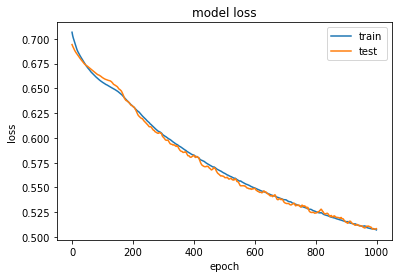

In [6]:
import matplotlib.pyplot as plt
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [7]:
# Evaluating model on validation data
evaluate = model.evaluate(X_val,y_val)
print(evaluate)

98/98 [==============================] - 0s 24us/step
[0.5084305594162065, 0.7040816326530612]
